In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


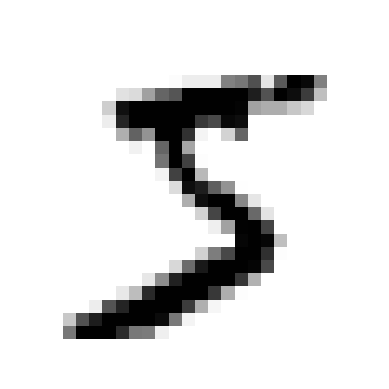

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X.iloc[0]
some_digit_image = np.array(some_digit).reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [7]:
y[0]

'5'

In [8]:
y = y.astype(np.uint8)

In [9]:
y[0]

5

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
import pandas as pd
sgd_clf.predict(pd.DataFrame([some_digit]))

array([ True])

In [14]:
some_digit

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [19]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [21]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))

Precision: 0.8370879772350012
Recall: 0.6511713705958311


In [22]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_train_5, y_train_pred))

F1 Score: 0.7325171197343846


In [23]:
y_scores = sgd_clf.decision_function([some_digit])

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [24]:
y_scores

array([2164.22030239])

In [25]:
threshold = 0

In [26]:
y_some_digit_pred = (y_scores > threshold)

In [27]:
y_some_digit_pred

array([ True])

In [28]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [32]:
len(precisions), len(recalls), len(thresholds)

(60001, 60001, 60000)

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    plt.xlabel("Threshold")
    plt.xlim((-50000, 50000))
    plt.ylim((0, 1))
    plt.grid()

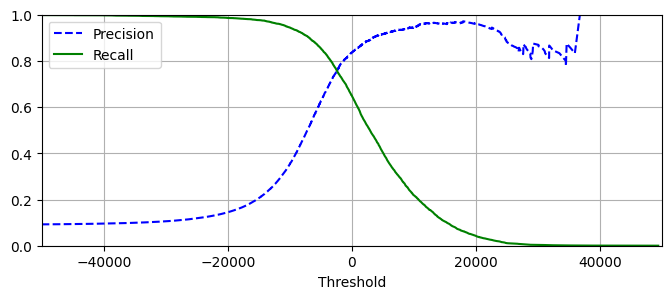

In [34]:
plt.figure(figsize=(8, 3))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.grid()

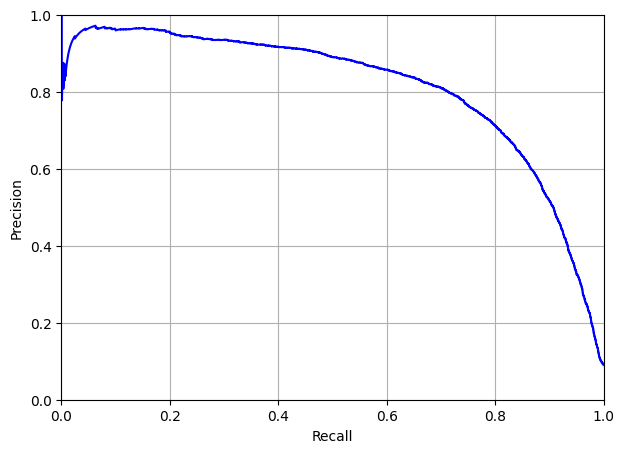

In [36]:
plt.figure(figsize=(7, 5))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [37]:
threshold_75_precision = thresholds[np.argmax(precisions >= 0.75)]

In [38]:
threshold_75_precision

-2551.6670906292193

In [39]:
y_train_pred_75 = (y_scores >= threshold_75_precision)

In [40]:
print("Precision:", precision_score(y_train_5, y_train_pred_75))
print("Recall:", recall_score(y_train_5, y_train_pred_75))

Precision: 0.75
Recall: 0.7659103486441616


In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed Diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid()

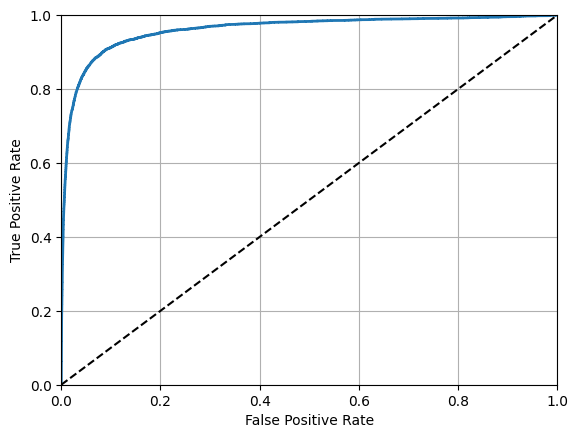

In [49]:
plot_roc_curve(fpr, tpr)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3, method="predict_proba")

In [53]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

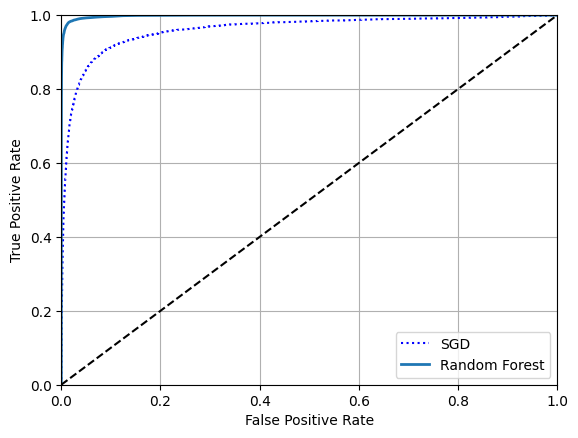

In [54]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [55]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [58]:
y_preds_forest = (y_scores_forest >= 0.5)
print("Precision (Forest): ", precision_score(y_train_5, y_preds_forest))
print("Recall (Forest): ", recall_score(y_train_5, y_preds_forest))

Precision (Forest):  0.9897468089558485
Recall (Forest):  0.8725327430363402


In [59]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [61]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [62]:
np.argmax(some_digit_scores)

5

In [63]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [65]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [66]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/kachhuaa/Desktop/ml

array([5], dtype=uint8)

In [67]:
len(ovr_clf.estimators_)

10

In [69]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [70]:
sgd_clf.decision_function([some_digit])

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [71]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,
                     scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [76]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,
                                cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

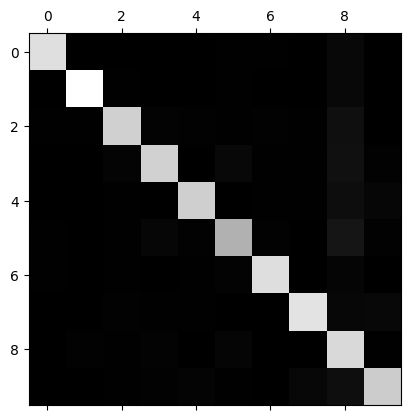

In [77]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [79]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

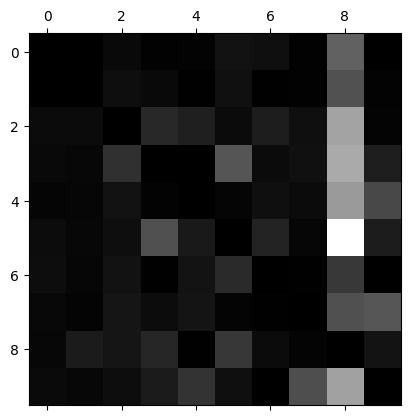

In [80]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [81]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [138]:
def plot_digits(digits, images_per_row):
    digits = [np.array(digit).reshape(28, 28) for digit in np.array(digits)]
    rows = []
    for i in range(0, len(digits), images_per_row):
        for r in range(28):
            row = []
            for digit in digits[i : i + images_per_row]:
                row.extend(digit[r])
            rows.append(row)
    rows = np.array(rows)
    plt.imshow(rows, cmap='binary')
    plt.axis('off')

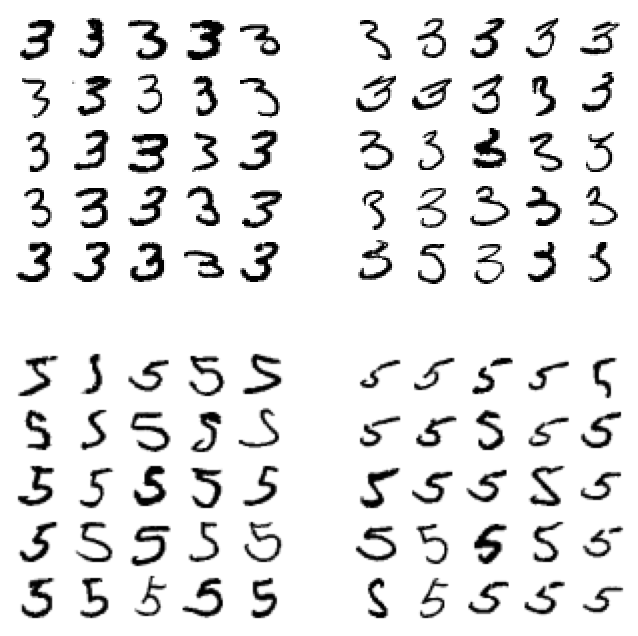

In [139]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [140]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [141]:
knn_clf.predict([some_digit])

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [142]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,
                                    cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [143]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [151]:
def plot_digit(digit):
    pixels = np.array(digit).reshape(28, 28)
    plt.imshow(pixels, cmap='binary')
    plt.axis('off')

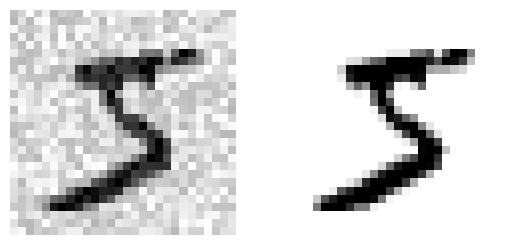

In [153]:
plt.subplot(121)
plot_digit(X_train_mod.iloc[0])
plt.subplot(122)
plot_digit(X_train.iloc[0])
plt.show()

/home/kachhuaa/Desktop/ml/envs/homl_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


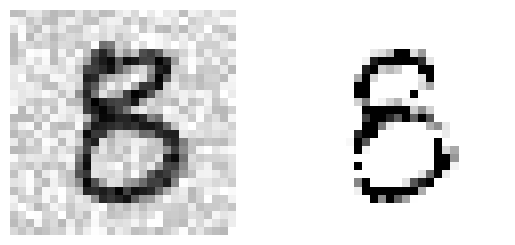

In [155]:
knn_clf.fit(X_train_mod, y_train_mod)
some_digit = X_test_mod.iloc[np.random.randint(len(X_test_mod))]
clean_digit = knn_clf.predict([some_digit])
plt.subplot(121)
plot_digit(some_digit)
plt.subplot(122)
plot_digit(clean_digit)